In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

## Load in the uber dataset

In [2]:
uberData = pd.read_csv('uber.csv',parse_dates=[3])

In [3]:
uberData

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


## Check for missing values - Impute or Remove

In [4]:
uberData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [5]:
print(uberData.isna().sum())
uberData[uberData.isna().any(axis=1)]

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57+00:00,-73.950581,40.779692,NaN,NaN,0


Here the NA's are missing completely at random, so we should remove the single entry

In [6]:
uberData = uberData.dropna()
uberData.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

There are also some entries with a passenger count of 0, which we may have to remove since there is no other information about the ride

In [7]:
uberData[uberData['passenger_count']<=0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
333,2137942,2011-08-05 07:03:08.0000001,10.1,2011-08-05 07:03:08+00:00,-74.013900,40.707800,-73.992300,40.749300,0
908,8484351,2011-09-06 12:25:19.0000002,11.7,2011-09-06 12:25:19+00:00,-73.981000,40.764600,-73.962900,40.778400,0
926,32941306,2012-03-26 18:11:24.0000002,3.3,2012-03-26 18:11:24+00:00,-73.979978,40.765821,-73.983894,40.766873,0
2000,12591041,2012-04-20 15:07:57.0000003,15.7,2012-04-20 15:07:57+00:00,-73.975285,40.750138,-73.974729,40.783151,0
3011,39400625,2012-01-07 19:19:08.0000004,6.1,2012-01-07 19:19:08+00:00,-73.977900,40.789100,-73.983700,40.773600,0
...,...,...,...,...,...,...,...,...,...
196797,26965490,2011-01-17 15:52:26.0000002,3.3,2011-01-17 15:52:26+00:00,-74.000760,40.757637,-74.004852,40.751947,0
197103,49116579,2011-12-10 15:33:12.0000008,7.3,2011-12-10 15:33:12+00:00,0.000000,0.000000,0.000000,0.000000,0
198872,12988511,2011-09-20 19:55:05.0000001,5.7,2011-09-20 19:55:05+00:00,-73.980300,40.742800,-73.967900,40.755600,0
198902,54393172,2011-08-22 21:10:56.0000002,12.1,2011-08-22 21:10:56+00:00,-73.996700,40.737200,-74.008500,40.704000,0


In [8]:
cleanData = uberData[uberData['passenger_count']>0]

We also want to drop the "Unnamed" column since it is not listed in the dataset (probably an index value but we can use the default ones for now)

In [9]:
cleanData = cleanData.drop('Unnamed: 0',1)

C:\Users\Jeremy\AppData\Local\Temp/ipykernel_17596/2663818635.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  cleanData = cleanData.drop('Unnamed: 0',1)


There are other incorrect entries such as a passenger count of 208

In [10]:
cleanData.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199291.000000,199291.000000,199291.000000,199291.000000,199291.000000,199291.000000
mean,11.366715,-72.529906,39.937072,-72.527194,39.924833,1.690528
std,9.910563,11.434738,7.723757,13.121316,6.795541,1.384807
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992065,40.734796,-73.991410,40.733826,1.000000
50%,8.500000,-73.981825,40.752585,-73.980095,40.753042,1.000000
75%,12.500000,-73.967158,40.767157,-73.963663,40.767995,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [11]:
cleanData[cleanData['passenger_count'] > 6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,2010-12-28 08:20:00.0000001,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208


In [12]:
cleanData = cleanData[cleanData['passenger_count'] < 7]
cleanData = cleanData.drop('key',axis=1)
cleanData = cleanData[cleanData['fare_amount']>0]

## Data Visualization

In [13]:
sns.set(rc = {'figure.figsize':(20,10)})

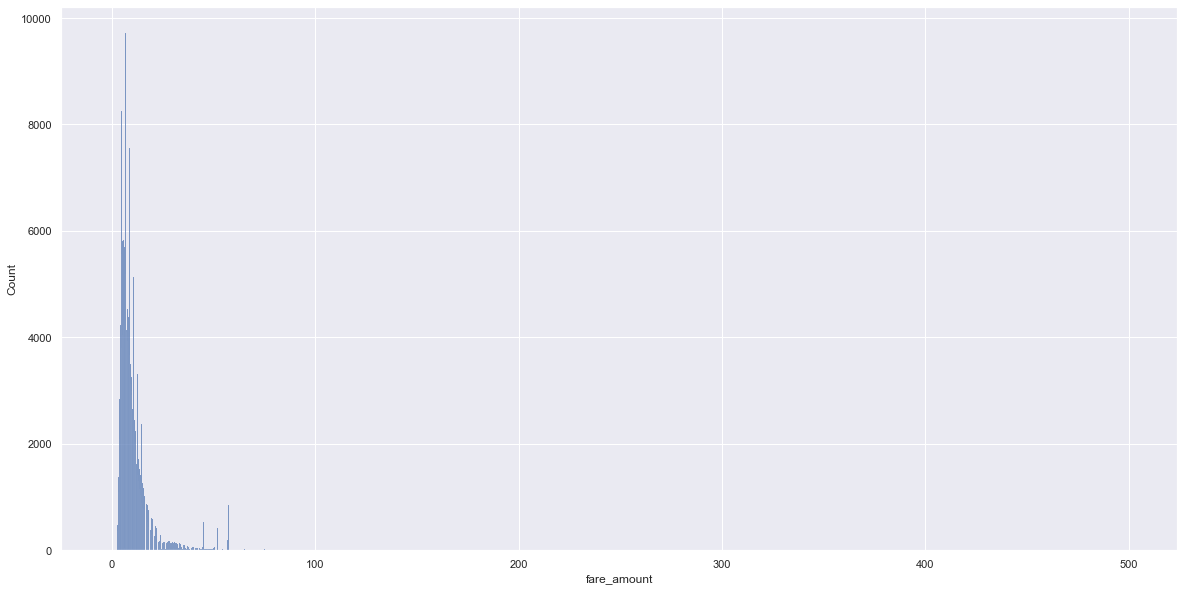

In [14]:
sns.histplot(data = cleanData, x = 'fare_amount');

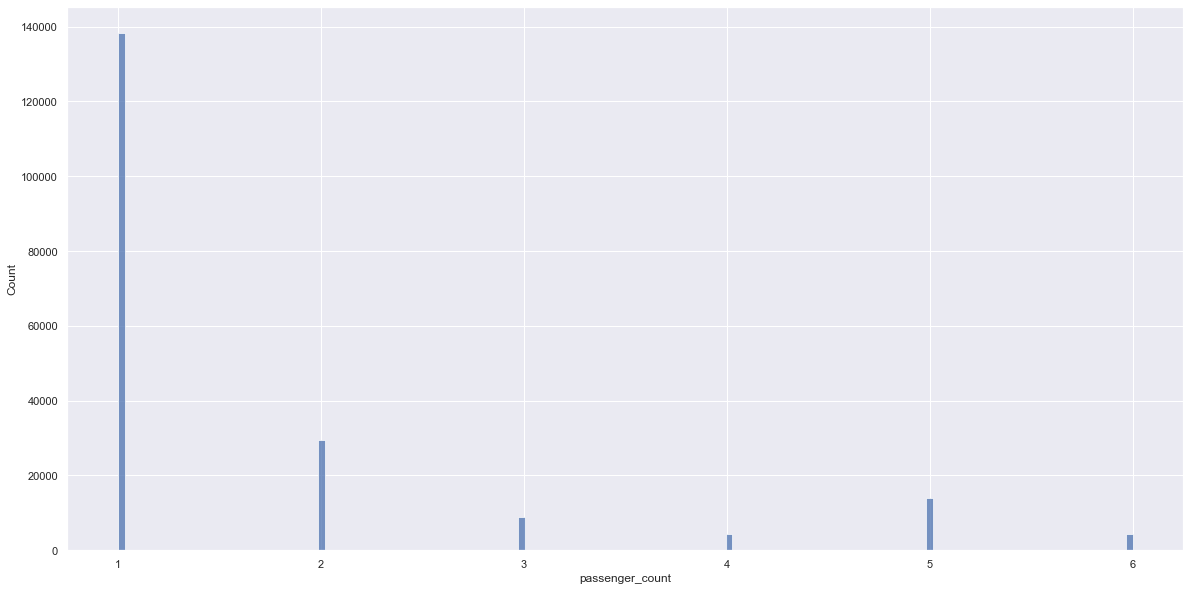

In [15]:
sns.histplot(data = cleanData, x = 'passenger_count');

,count,mean,std,min,25%,50%,75%,max
passenger_count,,,,,,,,
1,138414.0,11.26,9.85,0.01,6.0,8.5,12.5,499.00
2,29424.0,11.79,10.25,2.50,6.1,8.5,13.0,230.00
3,8878.0,11.50,10.26,2.50,6.1,8.5,12.9,350.00
4,4276.0,11.64,9.97,2.50,6.1,8.5,12.9,132.33
5,14005.0,11.21,9.30,2.50,6.0,8.5,12.5,100.50
6,4271.0,12.16,10.16,2.50,6.5,9.0,13.5,152.83


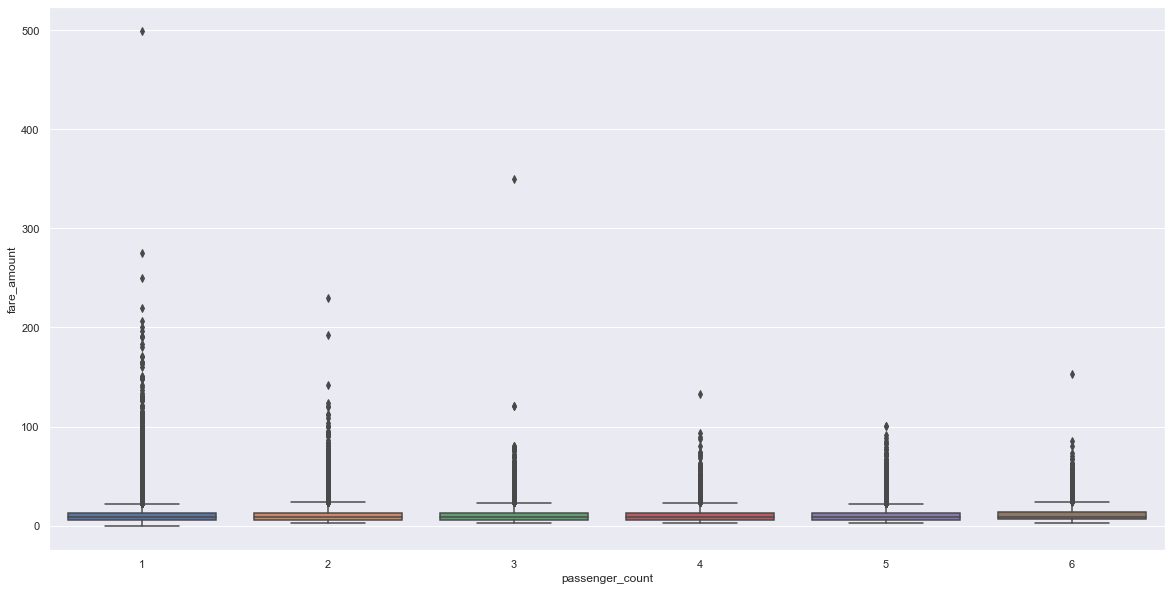

In [16]:
sns.boxplot(data = cleanData, x = 'passenger_count', y = 'fare_amount');
cleanData.groupby('passenger_count')['fare_amount'].describe().round(2)

Since the date is a long range of time, we can split it up to extract more details

<AxesSubplot:xlabel='pickup_datetime', ylabel='fare_amount'>

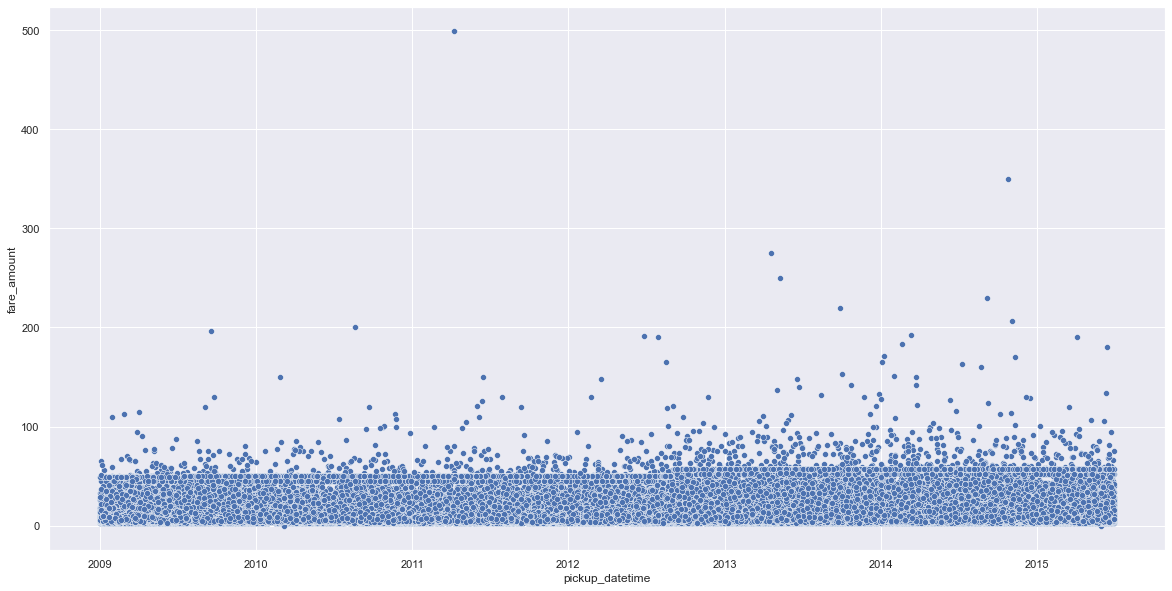

In [17]:
sns.scatterplot(data = cleanData, x = 'pickup_datetime', y = 'fare_amount')

#### By Year

In [18]:
cleanData['Year'] = cleanData['pickup_datetime'].dt.year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2009,30535.0,10.01,8.15,2.50,5.7,7.7,11.1,196.00
2010,30171.0,10.14,8.34,0.01,5.7,7.7,11.3,200.00
2011,31491.0,10.42,9.00,2.50,5.7,7.7,11.3,499.00
2012,32167.0,11.23,9.50,2.50,6.0,8.5,12.5,191.80
2013,31193.0,12.71,11.14,2.50,6.5,9.5,14.0,275.00
2014,29964.0,13.02,11.61,2.50,6.5,9.5,14.5,350.00
2015,13747.0,12.97,11.33,0.01,6.5,9.5,14.5,190.83


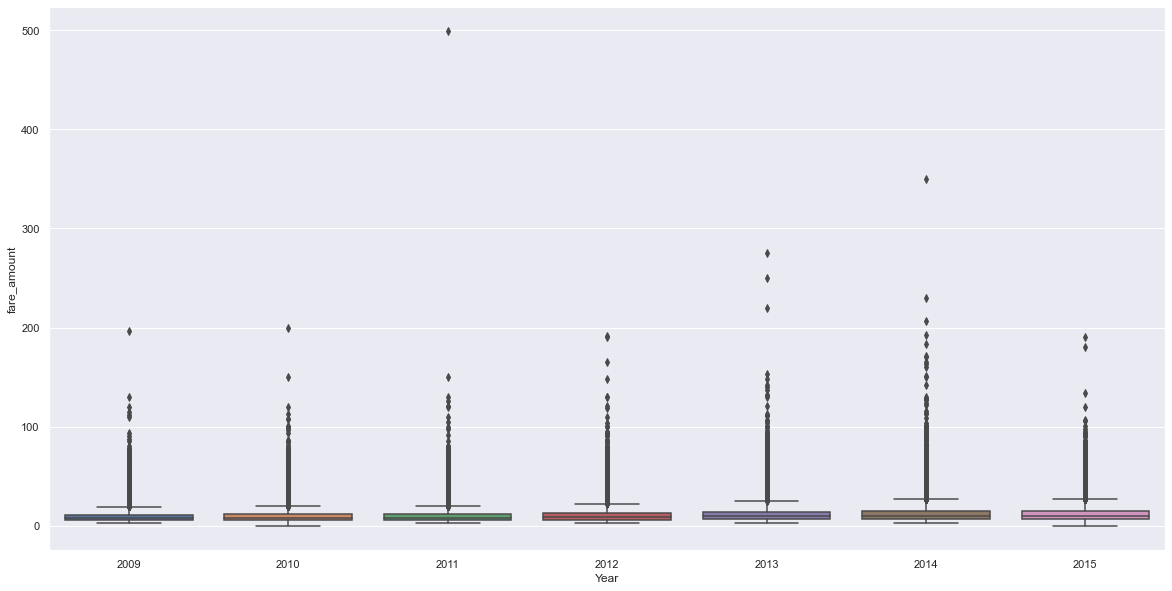

In [19]:
sns.boxplot(data = cleanData, x = 'Year', y = 'fare_amount')
cleanData.groupby('Year')['fare_amount'].describe().round(2)
#Hard to tell with plot, but the means of each year seme to be increasing slightly

##### By Month

In [20]:
cleanData['Month'] = cleanData['pickup_datetime'].dt.month_name()
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
cleanData['Month'] = pd.Categorical(cleanData['Month'], categories=months, ordered=True)

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
January,17601.0,10.73,9.28,2.50,5.7,8.0,11.7,171.35
February,16620.0,10.94,9.26,2.50,6.0,8.1,12.1,183.00
March,18660.0,11.13,9.67,0.01,6.0,8.1,12.5,192.33
April,18496.0,11.35,10.38,2.50,6.0,8.5,12.5,499.00
May,18817.0,11.69,10.22,0.01,6.1,8.5,13.0,250.00
June,17743.0,11.61,10.22,2.50,6.1,8.5,12.9,191.80
July,15053.0,11.17,9.32,2.50,6.0,8.5,12.5,190.00
August,14173.0,11.21,9.87,2.50,6.0,8.1,12.1,200.00
September,15218.0,11.80,10.40,2.50,6.1,8.5,13.3,230.00


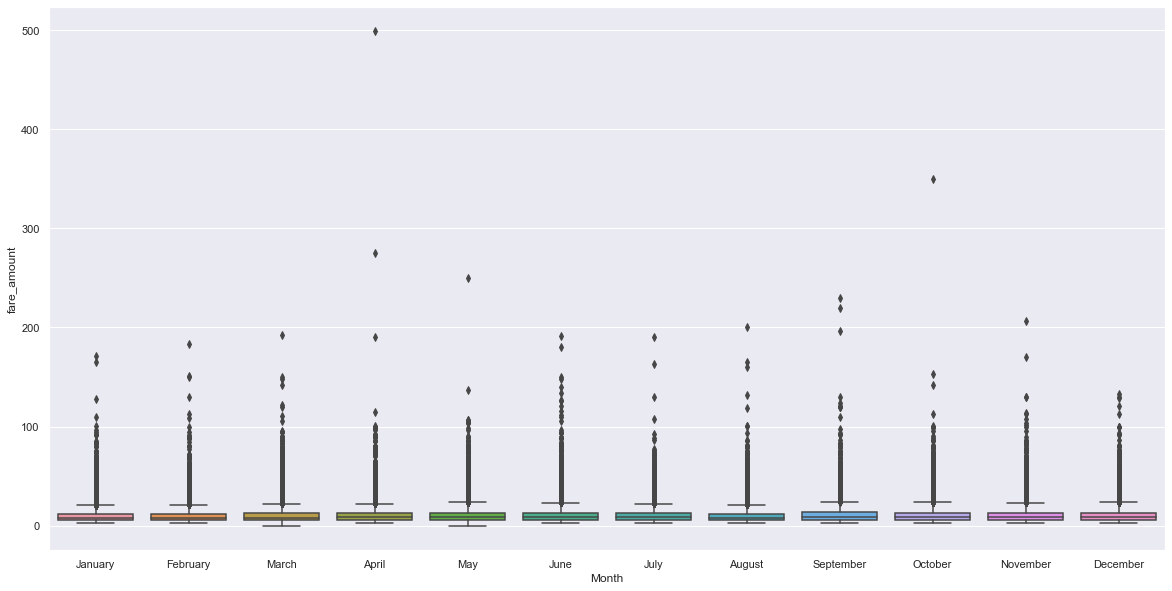

In [21]:
sns.boxplot(data = cleanData, x = 'Month', y = 'fare_amount')
cleanData.groupby('Month')['fare_amount'].describe().round(2)
#Fare amount seems relatively consistant given month

##### By Day

In [22]:
cleanData['Day'] = cleanData['pickup_datetime'].dt.day_name()
dayofweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cleanData['Day'] = pd.Categorical(cleanData['Day'], categories=dayofweek, ordered=True)

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
Monday,25121.0,11.39,10.05,0.01,6.0,8.1,12.5,170.00
Tuesday,28007.0,11.09,9.32,2.50,6.0,8.1,12.5,191.80
Wednesday,28933.0,11.36,9.82,2.50,6.0,8.5,12.5,192.33
Thursday,29924.0,11.53,9.92,2.50,6.1,8.5,12.9,200.00
Friday,30775.0,11.45,10.16,2.50,6.1,8.5,12.9,350.00
Saturday,30141.0,11.04,9.11,2.50,6.0,8.5,12.5,250.00
Sunday,26367.0,11.76,10.96,0.01,6.0,8.5,13.0,499.00


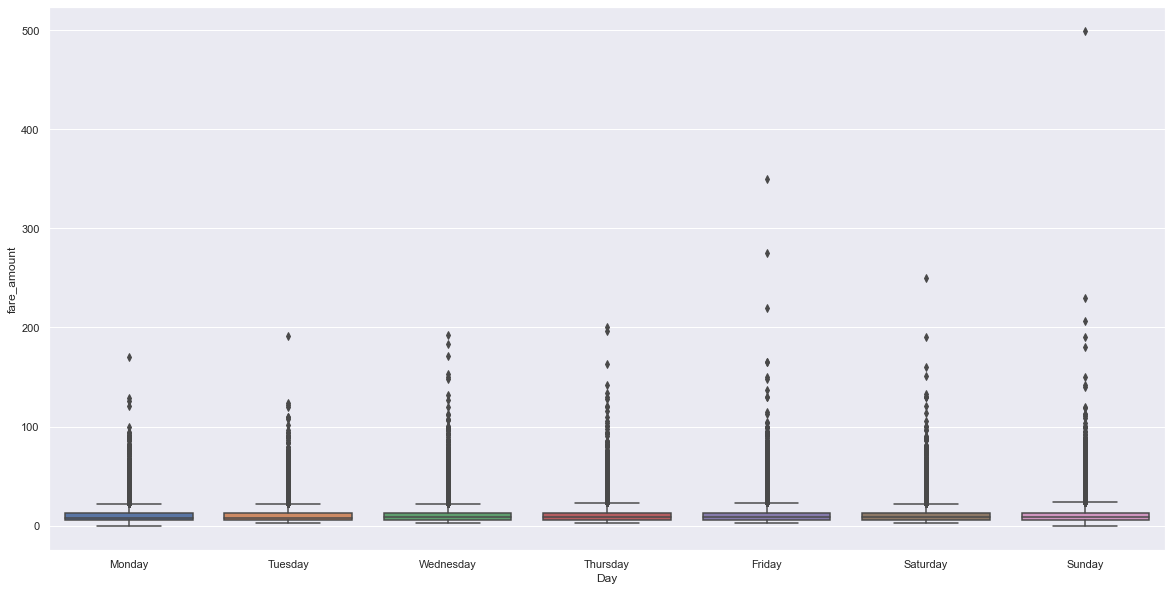

In [23]:
sns.boxplot(data = cleanData, x = 'Day', y = 'fare_amount')
cleanData.groupby('Day')['fare_amount'].describe().round(2)
#Seems to be consistant given the Day

##### By Hour

In [24]:
cleanData['Hour'] = cleanData['pickup_datetime'].dt.hour

,count,mean,std,min,25%,50%,75%,max
Hour,,,,,,,,
0,7817.0,11.66,9.89,2.50,6.1,8.9,13.7,275.00
1,5887.0,11.66,9.10,2.50,6.1,9.0,14.0,171.35
2,4405.0,11.45,9.11,2.50,6.1,8.9,13.7,130.00
3,3243.0,11.74,9.32,2.50,6.1,9.0,14.5,160.00
4,2356.0,14.17,15.38,2.50,6.5,10.1,17.0,499.00
5,1961.0,16.03,15.61,2.50,6.0,9.5,20.0,131.93
6,4119.0,11.95,11.69,2.50,5.5,7.7,12.5,106.50
7,7201.0,11.14,10.05,2.50,5.7,8.0,12.0,127.50
8,9040.0,10.91,9.67,2.50,5.7,8.1,12.1,230.00


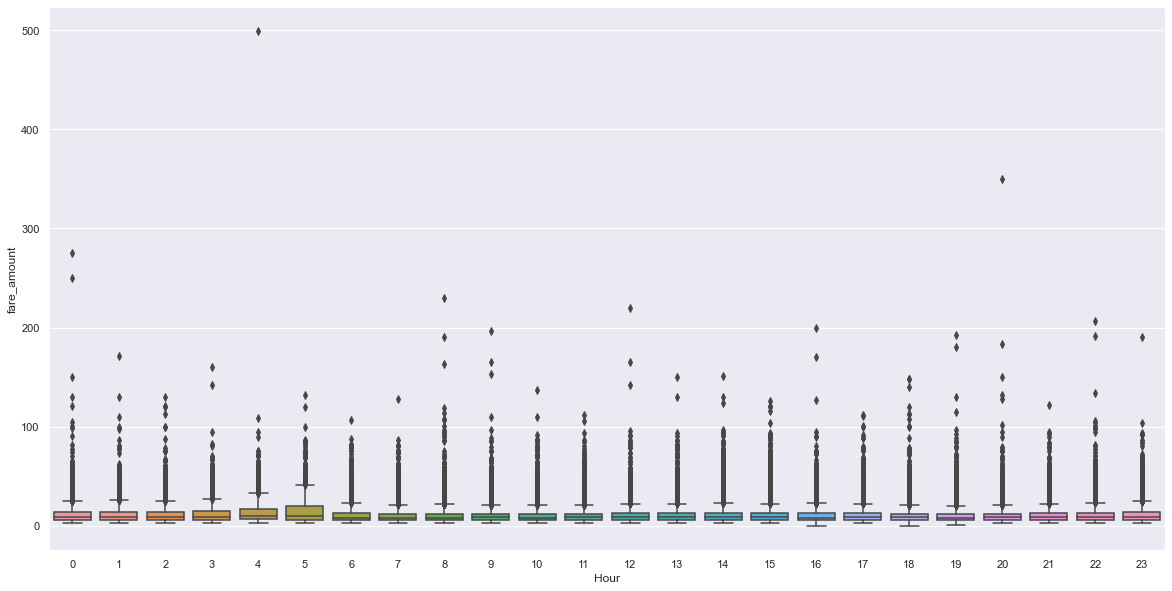

In [25]:
sns.boxplot(data = cleanData, x = 'Hour', y = 'fare_amount')
cleanData.groupby('Hour')['fare_amount'].describe().round(2)
#Noteably higher prices around 4:00-5:00
#May be able to group this category together

##### Longitude and Latitude

In order to get usable data with longitude and latitude, we have to transform it into some other measuting metric. In my case, I will transform it into a distance, but the possibility of classifying zip codes or city locations can also be explored.

In [26]:
import geopy.distance

In [27]:
#Latitude has to range from (-90,90) Longitude has to range (-180,180)
#Removing incorrect data entries
cleanData = cleanData[(cleanData['pickup_longitude'] >= -180) & (cleanData['pickup_longitude'] <= 180)]
cleanData = cleanData[(cleanData['dropoff_longitude'] >= -180) & (cleanData['dropoff_longitude'] <= 180)]
cleanData = cleanData[(cleanData['pickup_latitude'] >= -90) & (cleanData['pickup_latitude'] <= 90)]
cleanData = cleanData[(cleanData['dropoff_latitude'] >= -90) & (cleanData['dropoff_latitude'] <= 90)]

In [28]:
#Calculates distance between two (latitude,longitude) pairs
cleanData['Miles'] = cleanData.apply(lambda row: geopy.distance.geodesic((row[3],row[2]), (row[5],row[4])).miles,axis=1)

In [29]:
cleanData['Miles'].describe()

count    199256.000000
mean         12.628728
std         234.189353
min           0.000000
25%           0.755444
50%           1.318579
75%           2.407919
max        5457.871964
Name: Miles, dtype: float64

In [30]:
#Keep only rides >1mile or <50 miles to reduce the possibility of user input errors (rides shouldnt be 5,000 miles and $10)
#This does change the scope of any interpertations of a model
cleanData = cleanData[cleanData['Miles'] < 50]
cleanData = cleanData[cleanData['Miles'] > 1]

<AxesSubplot:xlabel='Miles', ylabel='fare_amount'>

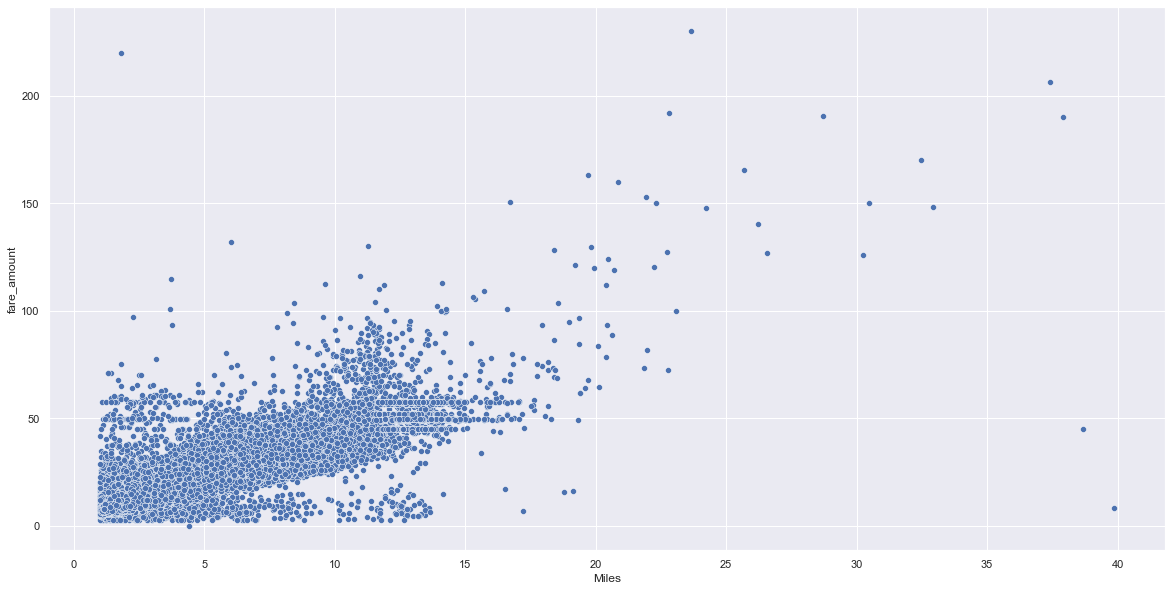

In [31]:
sns.scatterplot(data = cleanData, x = 'Miles', y = 'fare_amount')

### Modeling preprocessing - Encoding & Train/Test split

In [32]:
cleanData

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Miles
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,May,Thursday,19,1.044594
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,July,Friday,20,1.525071
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,August,Monday,21,3.131464
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,June,Friday,8,1.032372
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,August,Thursday,17,2.786061
...,...,...,...,...,...,...,...,...,...,...,...,...
199993,9.5,2012-09-29 19:51:27+00:00,-73.987798,40.721210,-73.980960,40.744388,1,2012,September,Saturday,19,1.639120
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,March,Friday,1,1.167951
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,June,Monday,0,7.995752
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,May,Wednesday,14,2.197512


For modeling, we will take into consideration the miles, time, and year to predict the fare.

In [33]:
modelData = cleanData[['fare_amount','Year','Hour','Miles']]
modelData = pd.get_dummies(modelData,prefix=['Year', 'Hour'], columns= ['Year', 'Hour']).copy()
modelData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125201 entries, 0 to 199999
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fare_amount  125201 non-null  float64
 1   Miles        125201 non-null  float64
 2   Year_2009    125201 non-null  uint8  
 3   Year_2010    125201 non-null  uint8  
 4   Year_2011    125201 non-null  uint8  
 5   Year_2012    125201 non-null  uint8  
 6   Year_2013    125201 non-null  uint8  
 7   Year_2014    125201 non-null  uint8  
 8   Year_2015    125201 non-null  uint8  
 9   Hour_0       125201 non-null  uint8  
 10  Hour_1       125201 non-null  uint8  
 11  Hour_2       125201 non-null  uint8  
 12  Hour_3       125201 non-null  uint8  
 13  Hour_4       125201 non-null  uint8  
 14  Hour_5       125201 non-null  uint8  
 15  Hour_6       125201 non-null  uint8  
 16  Hour_7       125201 non-null  uint8  
 17  Hour_8       125201 non-null  uint8  
 18  Hour_9       125201 non-

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_set, test_set = train_test_split(modelData, test_size=0.2, random_state=42)

In [38]:
x_train = train_set
x_train = x_train.drop('fare_amount',axis=1)
y_train = train_set['fare_amount']

x_test = test_set
x_test = x_test.drop('fare_amount',axis=1)
y_test = test_set['fare_amount']

### Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression().fit(x_train, y_train)

### Decision Tree Regressor Model

In [55]:
from sklearn.tree import DecisionTreeRegressor
dTreeReg = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)

### Model Evaluation (MSE,MAE)

In [ ]:
import sklearn.metrics as metrics

In [44]:
linYhat = linReg.predict(x_test)
linRegMAE = metrics.mean_absolute_error(y_test, linYhat)
linRegMSE = metrics.mean_squared_error(y_test, linYhat)
print("MAE: ", linRegMAE)
print("MSE: ", linRegMSE)

MAE:  2.5299884393695904
MSE:  20.412606815788134


In [56]:
dTreeYhat = dTreeReg.predict(x_test)
dTreeRegMAE = metrics.mean_absolute_error(y_test, dTreeYhat)
dTreeRegMSE = metrics.mean_squared_error(y_test, dTreeYhat)
print("MAE: ", dTreeRegMAE)
print("MSE: ", dTreeRegMSE)

MAE:  2.6671058748876777
MSE:  21.072318679743596


### Ensemble (RandomForestRegressor) and Hyperperameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [58]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [60]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [62]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.421552374334554 {'max_features': 2, 'n_estimators': 3}
5.193582700614384 {'max_features': 2, 'n_estimators': 10}
5.134857915701294 {'max_features': 2, 'n_estimators': 30}
5.360633238139686 {'max_features': 4, 'n_estimators': 3}
5.169989813065638 {'max_features': 4, 'n_estimators': 10}
5.071551175904738 {'max_features': 4, 'n_estimators': 30}
5.301704234560526 {'max_features': 6, 'n_estimators': 3}
5.111885494405342 {'max_features': 6, 'n_estimators': 10}
5.020210809051643 {'max_features': 6, 'n_estimators': 30}
5.268965939328079 {'max_features': 8, 'n_estimators': 3}
5.023963860547087 {'max_features': 8, 'n_estimators': 10}
4.954268601893484 {'max_features': 8, 'n_estimators': 30}
5.941217703296833 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5.9427962606854 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
5.947725776597715 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5.92872096466742 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
5

The best (lowest) RMSE was produced by 8 max features and 30 estimators, however this still did not outperform the linear regression model (This metric was RMSE while the regression metric was MSE)

In [63]:
print("Linear Regression RMSE: ",np.sqrt(linRegMSE))

Linear Regression RMSE:  4.5180312986729225
